# BANK MARKETING CLASSIFICATION
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).
Source of dataset :- UCI 

In [2064]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2065]:
dataset=pd.read_csv("bank-additional-full.csv",sep=';')

In [2066]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2067]:
categorical_features=[features for features in dataset.columns if dataset[features].dtypes=='O']
print(categorical_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [2068]:
for i in range(len(categorical_features)):
    print(pd.DataFrame(dataset[categorical_features[i]].unique(),columns=[categorical_features[i]]))
    i+=1

              job
0       housemaid
1        services
2          admin.
3     blue-collar
4      technician
5         retired
6      management
7      unemployed
8   self-employed
9         unknown
10   entrepreneur
11        student
    marital
0   married
1    single
2  divorced
3   unknown
             education
0             basic.4y
1          high.school
2             basic.6y
3             basic.9y
4  professional.course
5              unknown
6    university.degree
7           illiterate
   default
0       no
1  unknown
2      yes
   housing
0       no
1      yes
2  unknown
      loan
0       no
1      yes
2  unknown
     contact
0  telephone
1   cellular
  month
0   may
1   jun
2   jul
3   aug
4   oct
5   nov
6   dec
7   mar
8   apr
9   sep
  day_of_week
0         mon
1         tue
2         wed
3         thu
4         fri
      poutcome
0  nonexistent
1      failure
2      success
     y
0   no
1  yes


In [2069]:
for i in range(len(categorical_features)):
    print(pd.DataFrame(dataset[categorical_features[i]].value_counts()))
    i=i+1

                 job
admin.         10422
blue-collar     9254
technician      6743
services        3969
management      2924
retired         1720
entrepreneur    1456
self-employed   1421
housemaid       1060
unemployed      1014
student          875
unknown          330
          marital
married     24928
single      11568
divorced     4612
unknown        80
                     education
university.degree        12168
high.school               9515
basic.9y                  6045
professional.course       5243
basic.4y                  4176
basic.6y                  2292
unknown                   1731
illiterate                  18
         default
no         32588
unknown     8597
yes            3
         housing
yes        21576
no         18622
unknown      990
          loan
no       33950
yes       6248
unknown    990
           contact
cellular     26144
telephone    15044
     month
may  13769
jul   7174
aug   6178
jun   5318
nov   4101
apr   2632
oct    718
sep    570
mar   

In [2070]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [2071]:
print(dataset.shape)

(41188, 21)


# MISSING DATA

In [2072]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [2073]:
# There are no missing values in the dataset

# EXPLORATORY DATA ANALYSIS

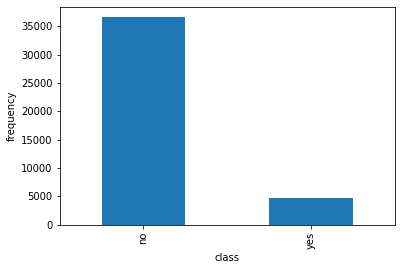

In [2074]:
y_count=dataset['y'].value_counts(sort=True)
y_count.plot(kind='bar')
plt.xlabel("class")
plt.ylabel("frequency")
plt.show()

In [2075]:
members=dataset[dataset['y']=='yes']
non_members=dataset[dataset['y']=='no']

In [2076]:
members.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


In [2077]:
non_members.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2078]:
#we have an umbalanced dataset
print(members.shape,non_members.shape)

(4640, 21) (36548, 21)


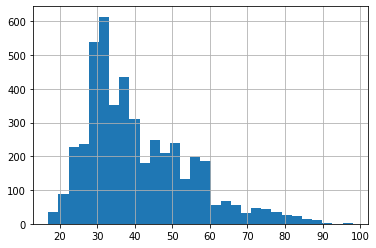

In [2079]:
members['age'].hist(bins=30)

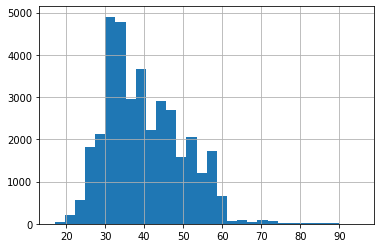

In [2080]:
non_members['age'].hist(bins=30)

In [2081]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
dataset[numerical_features].head()

Number of numerical variables:  10


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [2082]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


In [2083]:
discrete_feature

['previous', 'emp.var.rate', 'nr.employed']

In [2084]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
continuous_feature

Continuous feature Count 7


['age',
 'duration',
 'campaign',
 'pdays',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m']

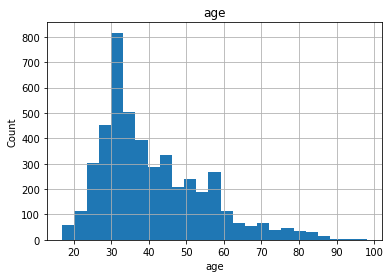

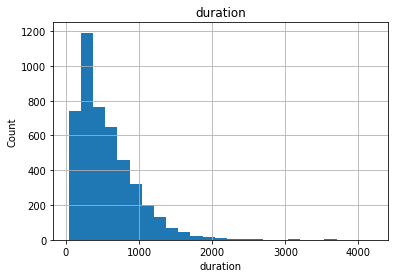

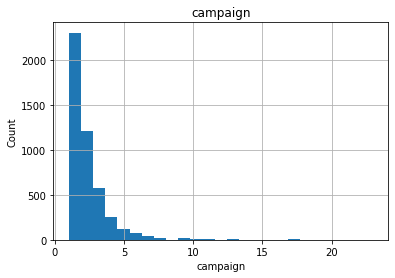

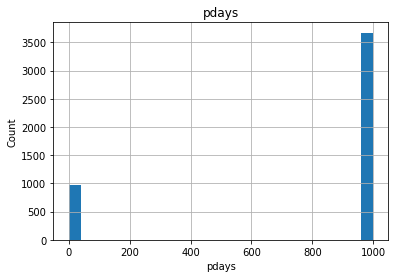

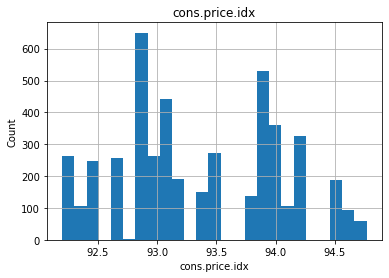

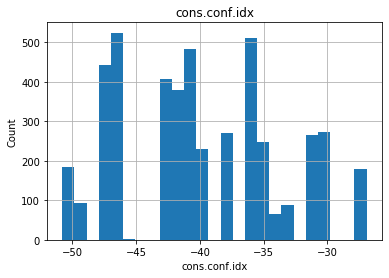

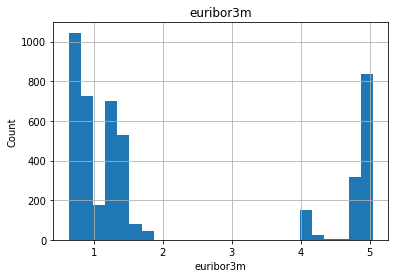

In [2085]:
for feature in continuous_feature:
    data=members.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# SECTION-2 : FEATURE ENGINEERING

# CATEGORICAL VARIABLE ENCODING - ORDINAL

In [2086]:
#Label encoding for education
edu={'unknown':0,'illiterate':1,'basic.4y':2,'basic.6y':3,'basic.9y':4,'high.school':5,'university.degree':6,'professional.course':7}
dataset.education=dataset.education.map(edu)
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,2,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,5,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,5,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,3,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,5,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2087]:
#Label encoding for day of week
days={'mon':0,'tue':1,'wed':2,'thu':3,'fri':4}
dataset['day_of_week']=dataset['day_of_week'].map(days)

In [2088]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,2,no,no,no,telephone,may,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,5,unknown,no,no,telephone,may,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,5,no,yes,no,telephone,may,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,3,no,no,no,telephone,may,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,5,no,no,yes,telephone,may,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2089]:
#Label encoding for months
mon={'mar':0,'apr':1,'may':2,'jun':3,'jul':4,'aug':5,'sep':6,'oct':7,'nov':8,'dec':9}
dataset['month']=dataset['month'].map(mon)
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,2,no,no,no,telephone,2,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,5,unknown,no,no,telephone,2,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,5,no,yes,no,telephone,2,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,3,no,no,no,telephone,2,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,5,no,no,yes,telephone,2,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2090]:
# Target guided ordinal categories for job
jobs=pd.Series(dataset['job'].value_counts())
jobs=jobs/len(dataset['job'])

In [2091]:
jobs

admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job, dtype: float64

In [2092]:
jobs_ordered={'admin.':11,'blue-collar':10,'technician':9,'services':8,'management':7,'retired':6,'entrepreneur':5,'self-employed':4,'housemaid':3,'unemployed':2,'student':1,'unknown':0}
dataset['job']=dataset['job'].map(jobs_ordered)
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,married,2,no,no,no,telephone,2,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,8,married,5,unknown,no,no,telephone,2,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,8,married,5,no,yes,no,telephone,2,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,11,married,3,no,no,no,telephone,2,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,8,married,5,no,no,yes,telephone,2,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# CATEGORICAL ENCODING - NOMINAL

In [2093]:
# Nominal variable encoding for marital
mar=pd.DataFrame(pd.get_dummies(dataset['marital'],drop_first=True))
dataset=pd.concat([dataset,mar],axis=1)
dataset.drop(['marital'],axis=1,inplace=True)
dataset.head()

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,married,single,unknown
0,56,3,2,no,no,no,telephone,2,0,261,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0
1,57,8,5,unknown,no,no,telephone,2,0,149,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0
2,37,8,5,no,yes,no,telephone,2,0,226,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0
3,40,11,3,no,no,no,telephone,2,0,151,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0
4,56,8,5,no,no,yes,telephone,2,0,307,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0


In [2094]:
# Nominal variable encoding for default
defa=pd.DataFrame(pd.get_dummies(dataset['default'],drop_first=True))
dataset=pd.concat([dataset,defa],axis=1)
dataset.drop(['default'],axis=1,inplace=True)
dataset.head()

,age,job,education,housing,loan,contact,month,day_of_week,duration,campaign,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,married,single,unknown,unknown,yes
0,56,3,2,no,no,telephone,2,0,261,1,...,93.994,-36.4,4.857,5191.0,no,1,0,0,0,0
1,57,8,5,no,no,telephone,2,0,149,1,...,93.994,-36.4,4.857,5191.0,no,1,0,0,1,0
2,37,8,5,yes,no,telephone,2,0,226,1,...,93.994,-36.4,4.857,5191.0,no,1,0,0,0,0
3,40,11,3,no,no,telephone,2,0,151,1,...,93.994,-36.4,4.857,5191.0,no,1,0,0,0,0
4,56,8,5,no,yes,telephone,2,0,307,1,...,93.994,-36.4,4.857,5191.0,no,1,0,0,0,0


In [2095]:
# Nominal variable encoding for contact
con=pd.DataFrame(pd.get_dummies(dataset['contact'],drop_first=True))
dataset=pd.concat([dataset,con],axis=1)
dataset.drop(['contact'],axis=1,inplace=True)
dataset.head()

,age,job,education,housing,loan,month,day_of_week,duration,campaign,pdays,...,cons.conf.idx,euribor3m,nr.employed,y,married,single,unknown,unknown,yes,telephone
0,56,3,2,no,no,2,0,261,1,999,...,-36.4,4.857,5191.0,no,1,0,0,0,0,1
1,57,8,5,no,no,2,0,149,1,999,...,-36.4,4.857,5191.0,no,1,0,0,1,0,1
2,37,8,5,yes,no,2,0,226,1,999,...,-36.4,4.857,5191.0,no,1,0,0,0,0,1
3,40,11,3,no,no,2,0,151,1,999,...,-36.4,4.857,5191.0,no,1,0,0,0,0,1
4,56,8,5,no,yes,2,0,307,1,999,...,-36.4,4.857,5191.0,no,1,0,0,0,0,1


In [2096]:
# Nominal variable encoding for housing
house=pd.DataFrame(pd.get_dummies(dataset['housing'],drop_first=True))
dataset=pd.concat([dataset,house],axis=1)
dataset.drop(['housing'],axis=1,inplace=True)
dataset.head()

,age,job,education,loan,month,day_of_week,duration,campaign,pdays,previous,...,nr.employed,y,married,single,unknown,unknown,yes,telephone,unknown,yes
0,56,3,2,no,2,0,261,1,999,0,...,5191.0,no,1,0,0,0,0,1,0,0
1,57,8,5,no,2,0,149,1,999,0,...,5191.0,no,1,0,0,1,0,1,0,0
2,37,8,5,no,2,0,226,1,999,0,...,5191.0,no,1,0,0,0,0,1,0,1
3,40,11,3,no,2,0,151,1,999,0,...,5191.0,no,1,0,0,0,0,1,0,0
4,56,8,5,yes,2,0,307,1,999,0,...,5191.0,no,1,0,0,0,0,1,0,0


In [2097]:
# Nominal variable encoding for loan
loans=pd.DataFrame(pd.get_dummies(dataset['loan'],drop_first=True))
dataset=pd.concat([dataset,loans],axis=1)
dataset.drop(['loan'],axis=1,inplace=True)
dataset.head()

,age,job,education,month,day_of_week,duration,campaign,pdays,previous,poutcome,...,married,single,unknown,unknown,yes,telephone,unknown,yes,unknown,yes
0,56,3,2,2,0,261,1,999,0,nonexistent,...,1,0,0,0,0,1,0,0,0,0
1,57,8,5,2,0,149,1,999,0,nonexistent,...,1,0,0,1,0,1,0,0,0,0
2,37,8,5,2,0,226,1,999,0,nonexistent,...,1,0,0,0,0,1,0,1,0,0
3,40,11,3,2,0,151,1,999,0,nonexistent,...,1,0,0,0,0,1,0,0,0,0
4,56,8,5,2,0,307,1,999,0,nonexistent,...,1,0,0,0,0,1,0,0,0,1


In [2098]:
# Nominal variable encoding for poutcome
pout=pd.DataFrame(pd.get_dummies(dataset['poutcome'],drop_first=True))
dataset=pd.concat([dataset,pout],axis=1)
dataset.drop(['poutcome'],axis=1,inplace=True)
dataset.head()

,age,job,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,...,unknown,unknown,yes,telephone,unknown,yes,unknown,yes,nonexistent,success
0,56,3,2,2,0,261,1,999,0,1.1,...,0,0,0,1,0,0,0,0,1,0
1,57,8,5,2,0,149,1,999,0,1.1,...,0,1,0,1,0,0,0,0,1,0
2,37,8,5,2,0,226,1,999,0,1.1,...,0,0,0,1,0,1,0,0,1,0
3,40,11,3,2,0,151,1,999,0,1.1,...,0,0,0,1,0,0,0,0,1,0
4,56,8,5,2,0,307,1,999,0,1.1,...,0,0,0,1,0,0,0,1,1,0


In [2099]:
# Nominal variable encoding for y
tar=pd.DataFrame(pd.get_dummies(dataset['y'],drop_first=True))
dataset=pd.concat([dataset,tar],axis=1)
dataset.drop(['y'],axis=1,inplace=True)
dataset.head()

,age,job,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,...,unknown,yes,telephone,unknown,yes,unknown,yes,nonexistent,success,yes
0,56,3,2,2,0,261,1,999,0,1.1,...,0,0,1,0,0,0,0,1,0,0
1,57,8,5,2,0,149,1,999,0,1.1,...,1,0,1,0,0,0,0,1,0,0
2,37,8,5,2,0,226,1,999,0,1.1,...,0,0,1,0,1,0,0,1,0,0
3,40,11,3,2,0,151,1,999,0,1.1,...,0,0,1,0,0,0,0,1,0,0
4,56,8,5,2,0,307,1,999,0,1.1,...,0,0,1,0,0,0,1,1,0,0


In [2100]:
cols = []
count = 1
for column in dataset.columns:
    if column == 'unknown':
        cols.append(f'unknown_{count}')
        count+=1
        continue
    cols.append(column)
dataset.columns = cols

In [2101]:
dataset.head()

,age,job,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,...,unknown_2,yes,telephone,unknown_3,yes,unknown_4,yes,nonexistent,success,yes
0,56,3,2,2,0,261,1,999,0,1.1,...,0,0,1,0,0,0,0,1,0,0
1,57,8,5,2,0,149,1,999,0,1.1,...,1,0,1,0,0,0,0,1,0,0
2,37,8,5,2,0,226,1,999,0,1.1,...,0,0,1,0,1,0,0,1,0,0
3,40,11,3,2,0,151,1,999,0,1.1,...,0,0,1,0,0,0,0,1,0,0
4,56,8,5,2,0,307,1,999,0,1.1,...,0,0,1,0,0,0,1,1,0,0


In [2102]:
cols = []
count = 1
for column in dataset.columns:
    if column == 'yes':
        cols.append(f'yes_{count}')
        count+=1
        continue
    cols.append(column)
dataset.columns = cols

In [2103]:
dataset.head()

,age,job,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,...,unknown_2,yes_1,telephone,unknown_3,yes_2,unknown_4,yes_3,nonexistent,success,yes_4
0,56,3,2,2,0,261,1,999,0,1.1,...,0,0,1,0,0,0,0,1,0,0
1,57,8,5,2,0,149,1,999,0,1.1,...,1,0,1,0,0,0,0,1,0,0
2,37,8,5,2,0,226,1,999,0,1.1,...,0,0,1,0,1,0,0,1,0,0
3,40,11,3,2,0,151,1,999,0,1.1,...,0,0,1,0,0,0,0,1,0,0
4,56,8,5,2,0,307,1,999,0,1.1,...,0,0,1,0,0,0,1,1,0,0


In [2104]:
dataset.rename(columns={"yes_4": "target" },inplace=True)
dataset.head()

,age,job,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,...,unknown_2,yes_1,telephone,unknown_3,yes_2,unknown_4,yes_3,nonexistent,success,target
0,56,3,2,2,0,261,1,999,0,1.1,...,0,0,1,0,0,0,0,1,0,0
1,57,8,5,2,0,149,1,999,0,1.1,...,1,0,1,0,0,0,0,1,0,0
2,37,8,5,2,0,226,1,999,0,1.1,...,0,0,1,0,1,0,0,1,0,0
3,40,11,3,2,0,151,1,999,0,1.1,...,0,0,1,0,0,0,0,1,0,0
4,56,8,5,2,0,307,1,999,0,1.1,...,0,0,1,0,0,0,1,1,0,0


In [2105]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(dataset.drop('target',axis=1))
scaled_features=scaler.transform(dataset.drop('target',axis=1))

In [2106]:
dataset_scaled=pd.DataFrame(scaled_features,columns=dataset.columns[:-1])
dataset_scaled.head()

,age,job,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,...,unknown_1,unknown_2,yes_1,telephone,unknown_3,yes_2,unknown_4,yes_3,nonexistent,success
0,1.533034,-2.030336,-1.578162,-0.787808,-1.402469,0.010471,-0.565922,0.195414,-0.349494,0.648092,...,-0.044115,-0.513600,-0.008535,1.31827,-0.156933,-1.048877,-0.156933,-0.422872,0.397706,-0.1857
1,1.628993,-0.179330,0.127402,-0.787808,-1.402469,-0.421501,-0.565922,0.195414,-0.349494,0.648092,...,-0.044115,1.947042,-0.008535,1.31827,-0.156933,-1.048877,-0.156933,-0.422872,0.397706,-0.1857
2,-0.290186,-0.179330,0.127402,-0.787808,-1.402469,-0.124520,-0.565922,0.195414,-0.349494,0.648092,...,-0.044115,-0.513600,-0.008535,1.31827,-0.156933,0.953401,-0.156933,-0.422872,0.397706,-0.1857
3,-0.002309,0.931273,-1.009640,-0.787808,-1.402469,-0.413787,-0.565922,0.195414,-0.349494,0.648092,...,-0.044115,-0.513600,-0.008535,1.31827,-0.156933,-1.048877,-0.156933,-0.422872,0.397706,-0.1857
4,1.533034,-0.179330,0.127402,-0.787808,-1.402469,0.187888,-0.565922,0.195414,-0.349494,0.648092,...,-0.044115,-0.513600,-0.008535,1.31827,-0.156933,-1.048877,-0.156933,2.364781,0.397706,-0.1857


In [2107]:
dataset_scaled_target=pd.concat([dataset_scaled,pd.DataFrame(dataset['target'])],axis=1)

In [2108]:
#Create independent and Dependent Features

columns = dataset_scaled_target.columns.tolist()

# Filter the columns to remove data we do not want 

columns = [c for c in columns if c not in ["target"]]

# Store the variable we are predicting 

target = "target"

# Define a random state 

state = np.random.RandomState(42)

X = dataset_scaled_target[columns]

Y = dataset_scaled_target[target]


X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(41188, 26)
(41188,)


In [2109]:
## Get the yes and the no dataset 

yes = dataset_scaled_target[dataset_scaled_target['target']==1]

no = dataset_scaled_target[dataset_scaled_target['target']==0]

In [2110]:
print(yes.shape,no.shape)

(4640, 27) (36548, 27)


Text(0, 0.5, 'Frequency')

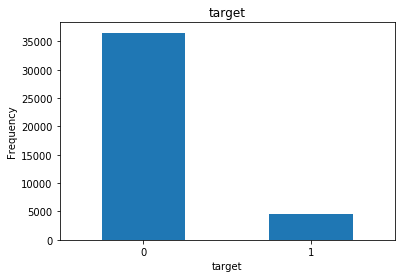

In [2111]:
# plot to illustrate the difference in the counts of 1(yes) and 0(no)
count_classes = pd.value_counts(dataset_scaled_target['target'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("target")

plt.xticks(range(2))

plt.xlabel("target")

plt.ylabel("Frequency")

In [2112]:
# The dataset is imbalanced and the model's perfrmance can be biased towards the category with higher count.
#To avoid this we can perform oversampling using the imblearn library

In [2113]:
# Implementing Oversampling for Handling Imbalanced dataset
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,Y)
X_res.shape,y_res.shape

((72888, 26), (72888,))

In [2114]:
dataset_balanced=pd.concat([X_res,y_res],axis=1)

In [2115]:
dataset_balanced.index

RangeIndex(start=0, stop=72888, step=1)

In [2116]:
dataset_balanced.tail()

,age,job,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,...,unknown_2,yes_1,telephone,unknown_3,yes_2,unknown_4,yes_3,nonexistent,success,target
72883,2.167954,-2.063092,-1.611697,0.710981,-1.360679,-0.092765,-0.565922,-5.117027,3.751362,-1.907540,...,-0.5136,-0.008535,1.257016,-0.156933,0.894346,-0.156933,-0.422872,-2.514421,-0.1857,1
72884,0.254429,-0.878055,0.379660,0.192116,-0.379648,1.608272,-0.405737,0.195414,-0.349494,0.839061,...,-0.5136,-0.008535,-0.758570,-0.156933,-1.048877,-0.156933,-0.422872,0.397706,-0.1857,1
72885,-1.153816,0.931273,0.324539,0.192116,0.722934,1.926560,-0.204909,0.195414,-0.349494,0.839061,...,-0.5136,-0.008535,-0.758570,-0.156933,-1.048877,-0.156933,-0.422872,0.397706,-0.1857,1
72886,3.697525,-0.919733,-1.578162,0.328430,-1.106814,-0.345031,-0.204909,0.195414,1.671136,-1.081150,...,-0.5136,-0.008535,-0.758570,-0.156933,0.953401,-0.156933,-0.422872,-2.514421,-0.1857,1
72887,0.266028,0.371066,-0.295222,-0.913545,-0.875812,3.659678,-0.380632,0.195414,-0.349494,-1.197935,...,-0.5136,-0.008535,-0.758570,-0.156933,-1.048877,-0.156933,-0.422872,0.397706,-0.1857,1


# FEATURE SELECTION

# FEATURE IMPORTANCE USING EXTRATREECLASSIFIER

In [2117]:
#Feature importance is an inbuilt class that comes with Tree Based Classifiers. Its been used here to extract 10 top features
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
X1 = dataset_balanced.iloc[:,:26]  #independent columns
y1 = dataset_balanced.iloc[:,-1]    #target column i.e price range
model = ExtraTreesClassifier()
model.fit(X1,y1)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [2118]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[4.13425244e-02 3.90254860e-02 4.18876961e-02 3.31339704e-02
 5.24133443e-02 2.92199952e-01 3.76393149e-02 2.56286734e-02
 7.32617082e-03 6.07687845e-02 3.31307136e-02 3.27253596e-02
 1.13116644e-01 6.08773097e-02 1.19894791e-02 8.91562038e-03
 5.22979330e-04 1.62668751e-02 5.79652136e-07 2.87763031e-02
 1.71818415e-03 1.81999212e-02 1.80029590e-03 1.12914197e-02
 9.58908372e-03 1.97133151e-02]


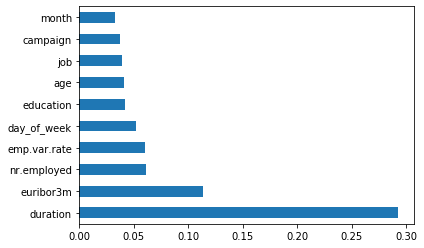

In [2119]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# FEATURE SELECTION USING HEATMAP CORRELATION

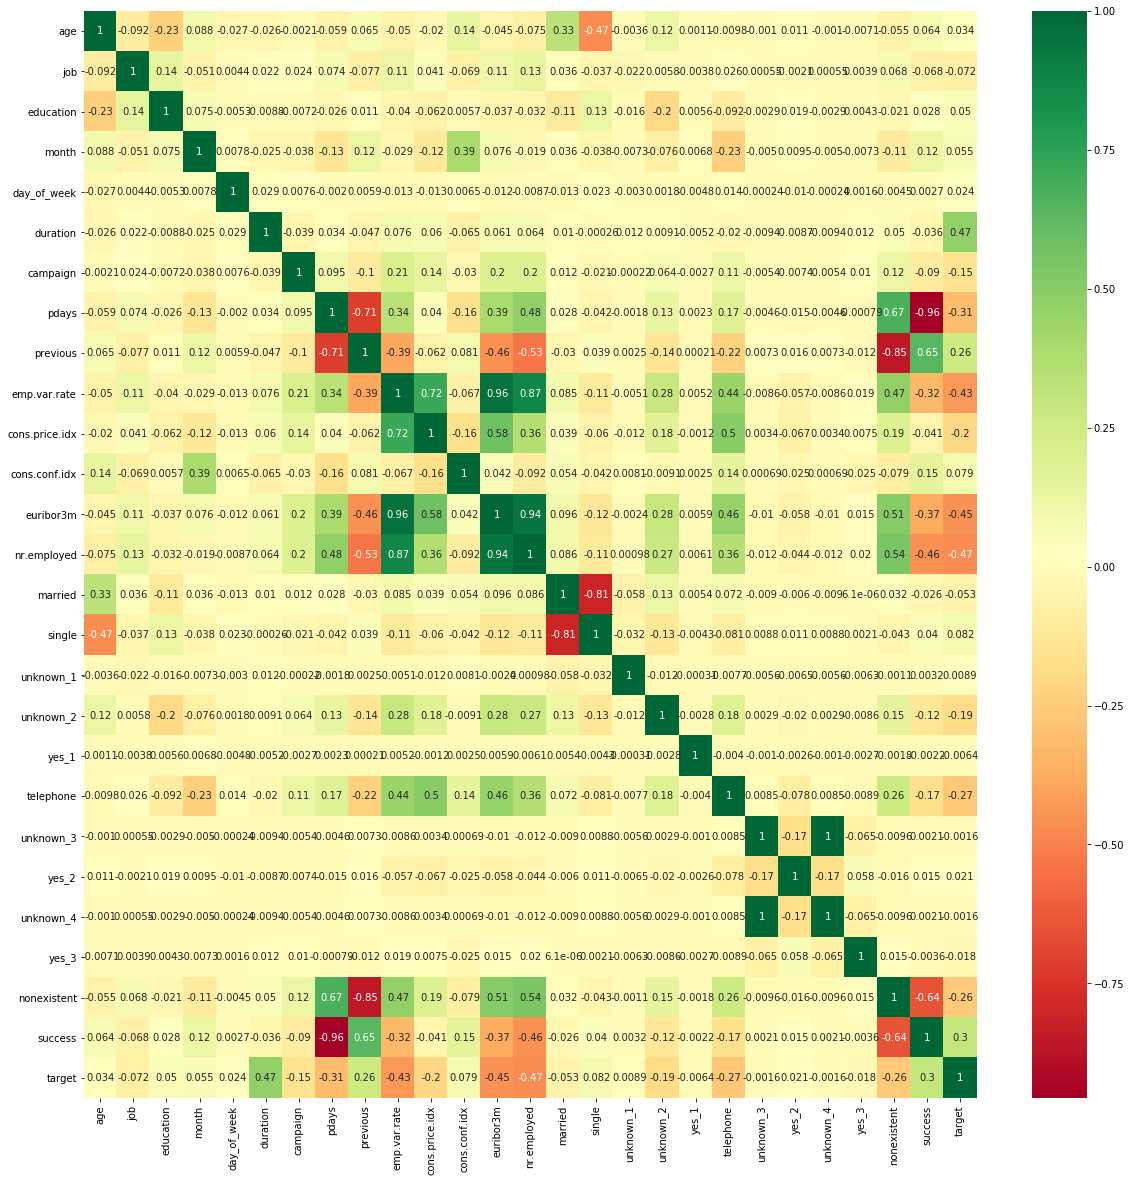

In [2120]:
#get correlations of each features in dataset
corrmat = dataset_balanced.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset_balanced[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [2121]:
# The heatmap shows the duration feature as having the highest correlation with the target variable

In [2122]:
# Extracting the top 10 features of the dataset
X2=X1[['duration','euribor3m','nr.employed','emp.var.rate','day_of_week','education','age','job','campaign','cons.conf.idx']]

# Model Building

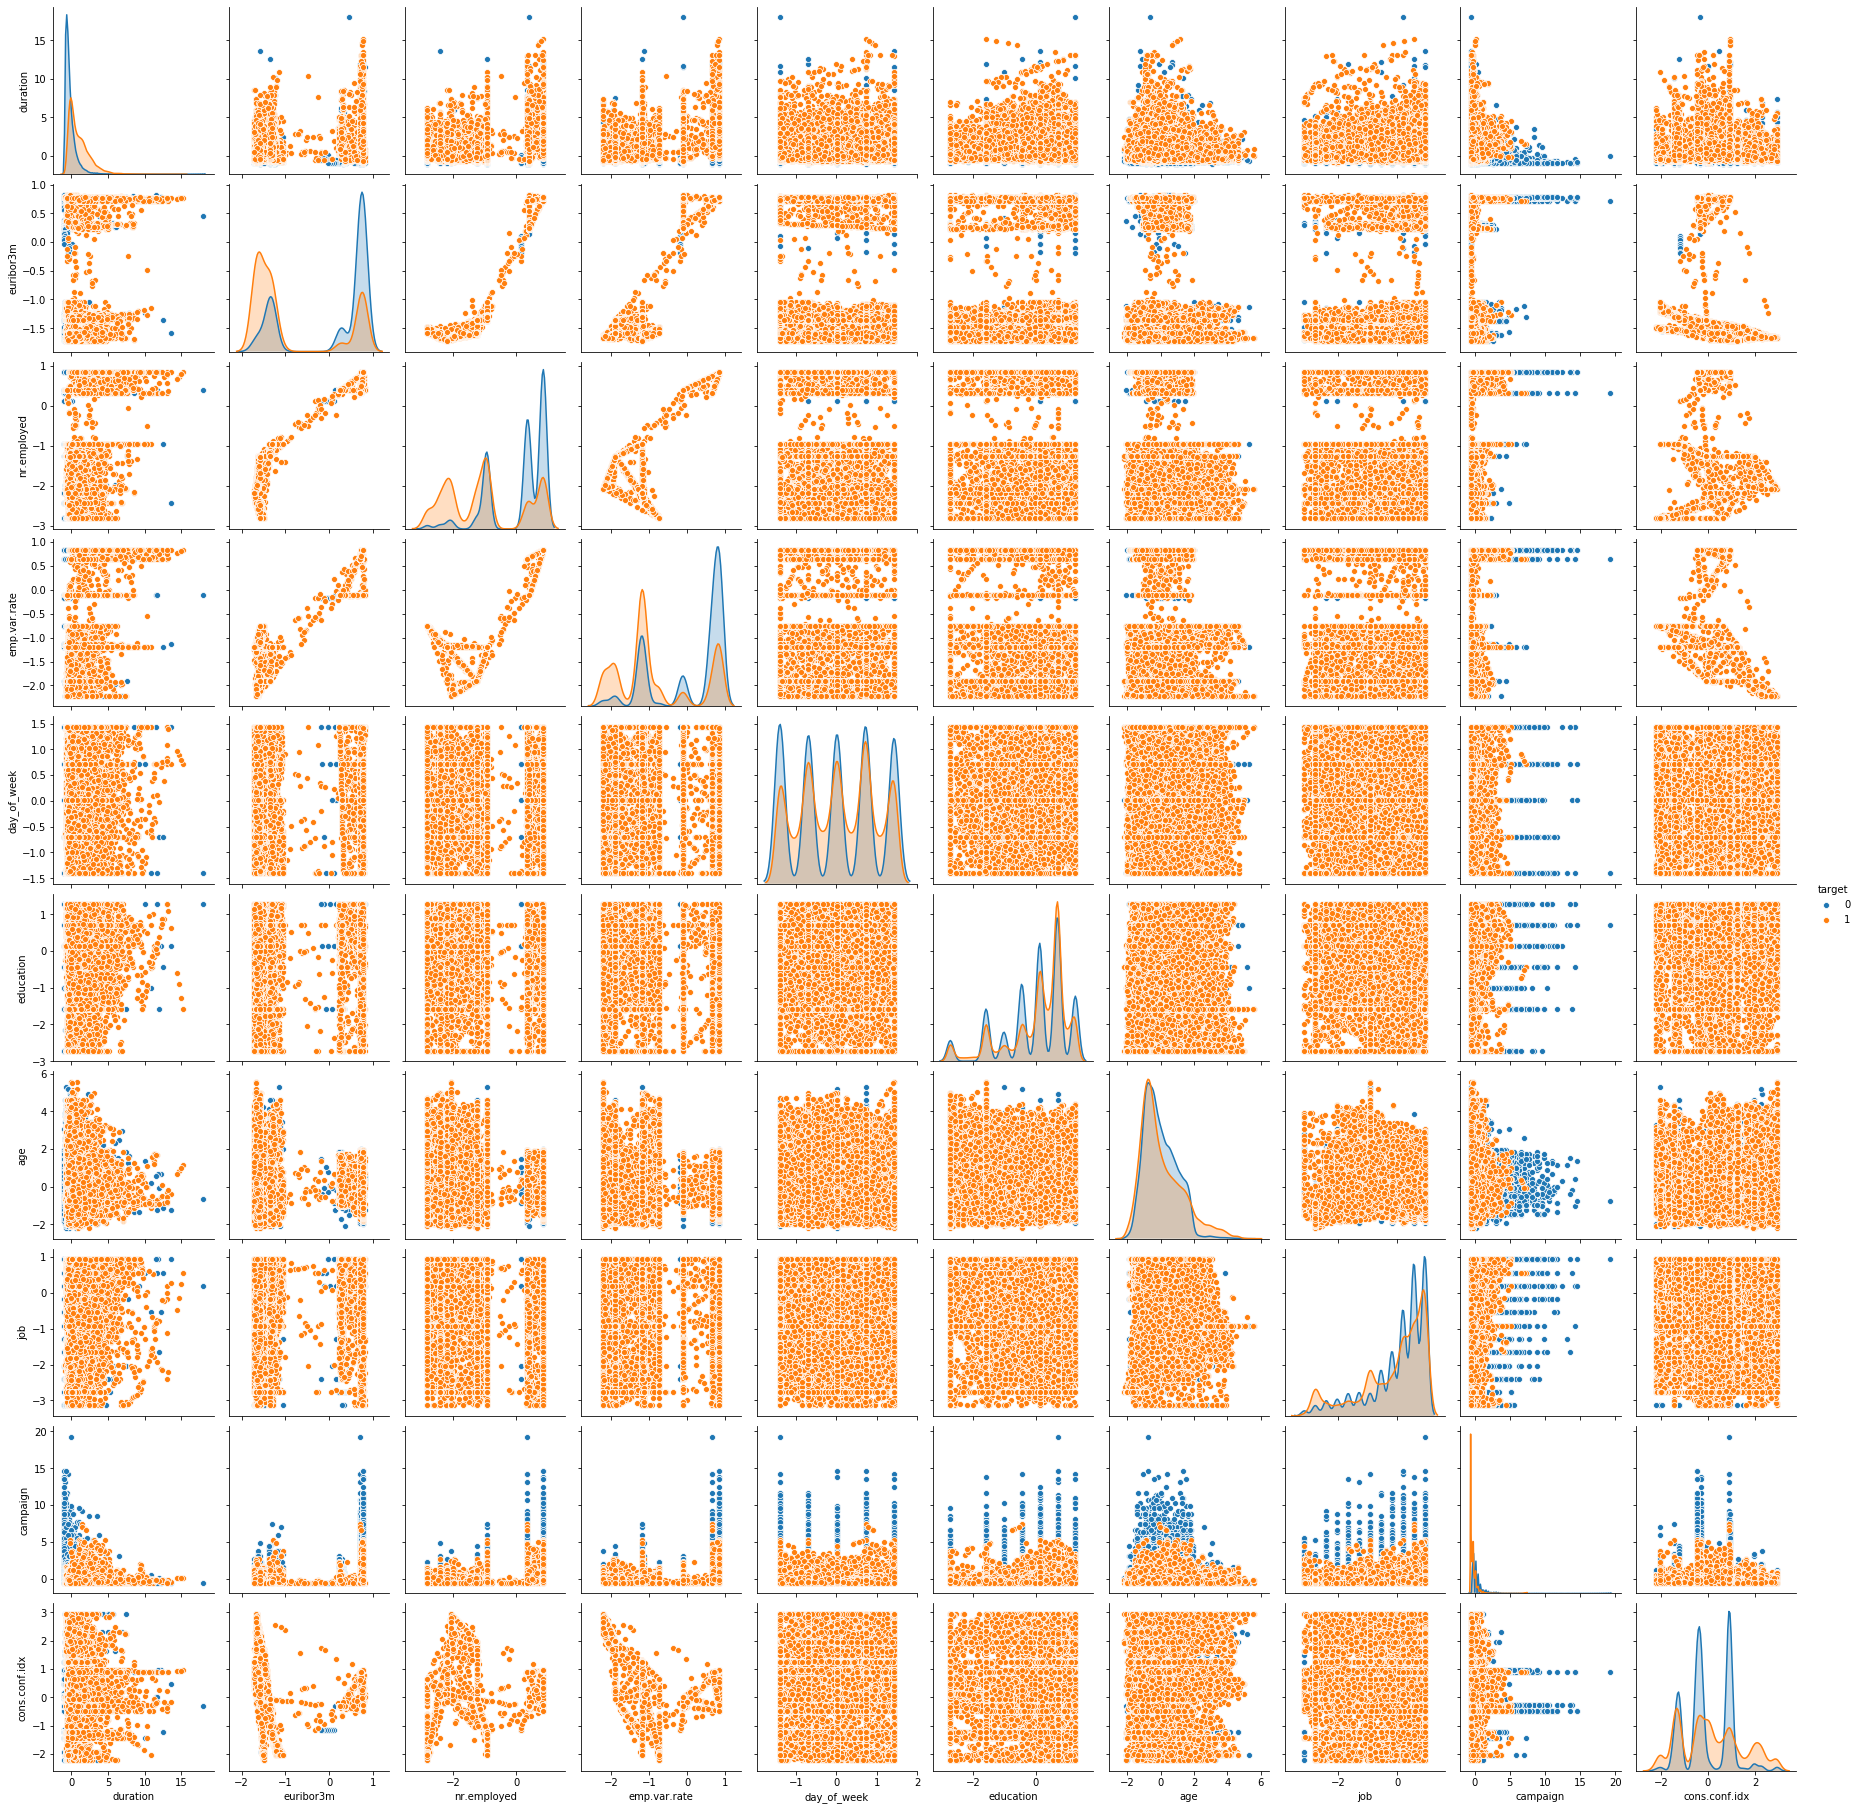

In [2123]:
sns.pairplot(dataset_balanced[['duration','euribor3m','nr.employed','emp.var.rate','day_of_week','education','age','job','campaign','cons.conf.idx','target']],hue='target')

In [2124]:
# From the pairplot we can make out that there's overlapping between the two target variable categories
# Therefore only non-linear classifiers can be used
# KNN and XGBoost algorithms have been used for optimal model performance

In [2125]:
#Hyper Parameter Optimization for XGBoost

params={
"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
"max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
"min_child_weight" : [ 1, 3, 5, 7 ],
"gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
"colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [2126]:
#Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [2127]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

# XGBOOST

In [2128]:
classifier=xgboost.XGBClassifier()

In [2129]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [2130]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X2,y1)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   20.5s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   22.2s finished



 Time taken: 0 hours 0 minutes and 24.35 seconds.


In [2131]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [2132]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.25,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [2161]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.3, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [2176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2,y1,random_state =5)

In [2177]:
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

In [2178]:
pred1=classifier.predict(X_test)

In [2180]:
#prediction and Classification Report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, pred1))
print(confusion_matrix(y_test, pred1))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      9040
           1       0.94      0.95      0.95      9182

    accuracy                           0.95     18222
   macro avg       0.95      0.95      0.95     18222
weighted avg       0.95      0.95      0.95     18222

[[8518  522]
 [ 461 8721]]


In [2186]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X2,y1,cv=200,scoring ='accuracy')

In [2187]:
score

array([0.50136986, 0.60273973, 0.73424658, 0.75890411, 0.69315068,
       0.69589041, 0.65205479, 0.69041096, 0.60547945, 0.64657534,
       0.70410959, 0.5260274 , 0.55342466, 0.7260274 , 0.77260274,
       0.68219178, 0.83835616, 0.63287671, 0.7890411 , 0.89589041,
       0.86575342, 0.95342466, 0.9369863 , 0.92054795, 0.78082192,
       0.90958904, 0.98630137, 1.        , 0.98630137, 0.99452055,
       0.99726027, 0.99178082, 1.        , 0.9890411 , 0.99452055,
       0.9890411 , 0.99178082, 0.9890411 , 0.99452055, 0.97260274,
       0.98630137, 0.98356164, 0.97260274, 0.99178082, 0.97534247,
       0.97808219, 0.9890411 , 0.96986301, 0.97260274, 0.98630137,
       0.98082192, 0.98630137, 0.97808219, 0.98356164, 0.98356164,
       0.9890411 , 0.96712329, 0.98356164, 0.97808219, 0.9890411 ,
       0.9890411 , 0.98630137, 0.99178082, 0.99178082, 0.97260274,
       0.96986301, 0.97808219, 0.98082192, 0.98356164, 0.96986301,
       0.97260274, 0.96986301, 0.98356164, 0.95890411, 0.98082

In [2188]:
score.mean()

0.9214716995333433

# K-NN Classifier

In [2139]:
from sklearn.neighbors import KNeighborsClassifier

In [2140]:
knn=KNeighborsClassifier(n_neighbors=1)

In [2141]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [2142]:
pred=knn.predict(X_test)

In [2143]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn import metrics

In [2144]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 9767  1180]
 [  382 10538]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.93     10947
           1       0.90      0.97      0.93     10920

    accuracy                           0.93     21867
   macro avg       0.93      0.93      0.93     21867
weighted avg       0.93      0.93      0.93     21867



# NAIVE BAYES CLASSIFIER

In [2146]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [2147]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7811985512018439


In [2154]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(gnb, X2, y1, cv=1000, scoring ='accuracy').mean())

0.7859649923896499


In [2155]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6628 2582]
 [1405 7607]]
              precision    recall  f1-score   support

           0       0.83      0.72      0.77      9210
           1       0.75      0.84      0.79      9012

    accuracy                           0.78     18222
   macro avg       0.79      0.78      0.78     18222
weighted avg       0.79      0.78      0.78     18222

